# Predicting survival on the Titanic using machine learning

This notebook is made for a Kaggle Competition.
> https://www.kaggle.com/c/titanic/overview

This notebook looks into using various Python-based machine learning and data science libraries in attemt to build a machine learning model capable of predicting whether or not a passenger survived from the sinking of Titanic.



I'm going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1.Problem Definition

Given data about passenger, can we predict whether or not they survived from the sinking of Titanic?

## 2. Data
The data is downloaded from Kaggle Bluebook for Titanic Competition.
> https://www.kaggle.com/c/titanic/data

* Train.csv is the training set, which contains 891 passengers.
* Test.csv is the testing set, which contains 418 passengers.
* Gender_submission.csv is a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## 3. Evaluation
The evaluation metric for this competition is the percentage of correctly predicted passengers - accuracy.

## 4. Features

In [5]:
df = pd.DataFrame(columns=["Variable","Definition", "Key"])
df["Variable"] = ["survival", "pclass", "sex","age" , "sibsp" ,"parch","ticket","fare","cabin","embarked"]
df["Definition"] = ["Survival", "Ticket class", "Sex", "Age in years", "# of siblings / spouses aboard the Titanic", "# of parents / childer aboard the Titanic", "Ticket number", "Passenger fare", "Cabin number", "Port of Embarkation"]
df["Key"] = ""
df["Key"][:2] = ["0 = No, 1 = Yes","1 = 1st, 2 = 2nd, 3 = 3rd"]
df["Key"][-1:] = ["C = Cherbourg, Q = Queenstown, S = Southampton"]
df.style.hide_index()

NameError: name 'pd' is not defined

## Preparing the tools
I'm going to use pandas, matplotlib and NumPy fot data analysis and manipulation.

In [6]:

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots appearing inside the notebook
%matplotlib inline

# Models from SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Import training and validation set

In [7]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train.shape, df_test.shape

((891, 12), (418, 11))

## Data Exploration (exploratory data analysis)

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
Cheking if dataframe has nulls

**Training set**

SyntaxError: invalid syntax (<ipython-input-12-d9fda1817845>, line 1)

In [13]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df_train.isna().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Most of missing values are in Age (about 20%) and in Cabin (about 77%) and in the Embarked, there are 2 missing values (less than 1%)



In [15]:
# Changing Male/Female to 0/1
df_train["Sex"] = df_train["Sex"].map(dict(zip(["male", "female"], [0,1])))

In [16]:
# Changing 'Embarked' column to categorical
df_train["Embarked"] = df_train["Embarked"].astype("category")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(1), float64(2), int64(6), object(3)
memory usage: 77.7+ KB


In [17]:

df_train["Embarked"] = df_train["Embarked"].cat.codes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int64(6), int8(1), object(3)
memory usage: 77.6+ KB


**Test set**

In [19]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
df_test.isna().sum()/len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Most of the missing values in test set are in Age (about 21%) and in Cabit (about 78%) and in Fare, there is one missing value.

In [21]:
# Let's find how many of passengers survived in our Training Set
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

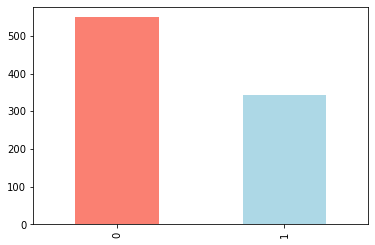

In [22]:
df_train["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [23]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.529742
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [24]:
df_train["Age"].mean(),df_train["Age"].median()

(29.69911764705882, 28.0)

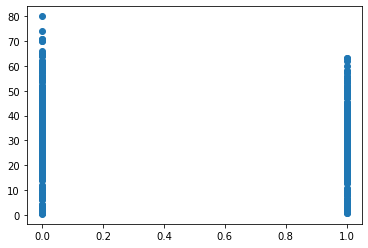

In [25]:
plt.scatter(df_train["Sex"], df_train["Age"])

In [26]:
# Compare Survived column with Sex column
pd.crosstab(df_train["Survived"], df_train["Sex"])

Sex,0,1
Survived,,
0,468,81
1,109,233


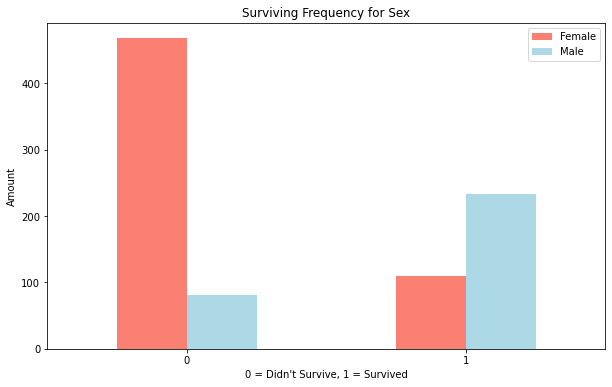

In [27]:
# Create a plot of crosstab
pd.crosstab(df_train["Survived"], df_train["Sex"]).plot(kind="bar",
                                                        figsize=(10,6),
                                                        color=["salmon","lightblue"])
plt.title("Surviving Frequency for Sex")
plt.xlabel("0 = Didn't Survive, 1 = Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Definitely more males didn't survive, and more females survived.

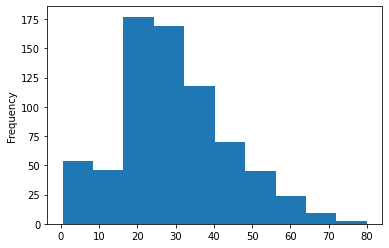

In [28]:
# Check the distribution of the age column with histogram
df_train["Age"].plot.hist();

### Most people are between 18 and 32



In [29]:
# Make a correlation matrix
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,0.012985
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.176509
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.173511
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.118492
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.044830
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.071480
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.043351
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.230365
Embarked,0.012985,-0.176509,0.173511,-0.118492,-0.044830,0.071480,0.043351,-0.230365,1.000000


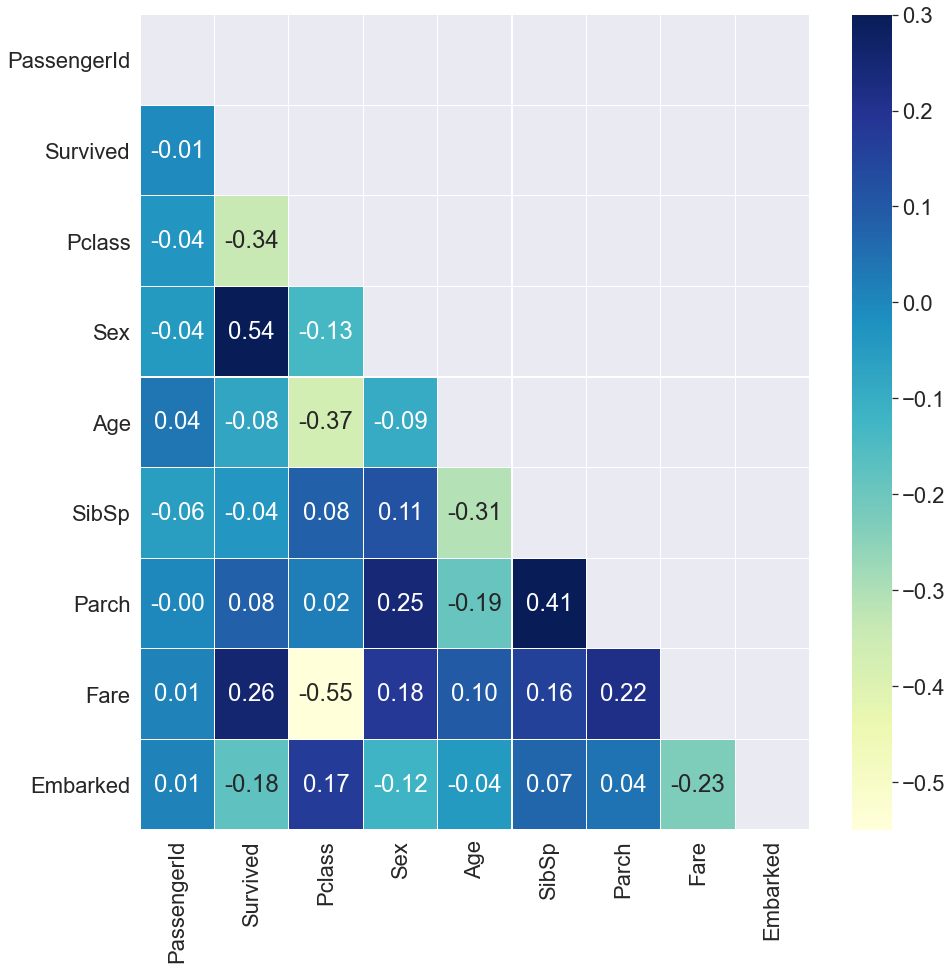

In [30]:
# Correlation matrix using seaborn heatmap
corr_matrix = df_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
sns.set(font_scale=2) 

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                 vmax=.3,
                 annot=True,
                 linewidths=0.2,
                 fmt=".2f",
                 cmap="YlGnBu",
                 mask = mask)

From this heat map we can deduce that:
1. The Higher Fare the Higher probability of surviving
2. The Lower Class (1st class) the Higher Probability of surviving
3. Females have higher probability of Surviving

In [31]:
df_train.Age[df_train["Parch"] < 1].isna().sum()

157

Since Age has missing values and has no correlation with Surviving I will replace missing values with median. 

TO TEST:
Probably I should try replace only those values that have Parch and SibSp column < 1


In [32]:
df_train["Age"].fillna(value=df_train["Age"].median(), inplace=True)

In [33]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

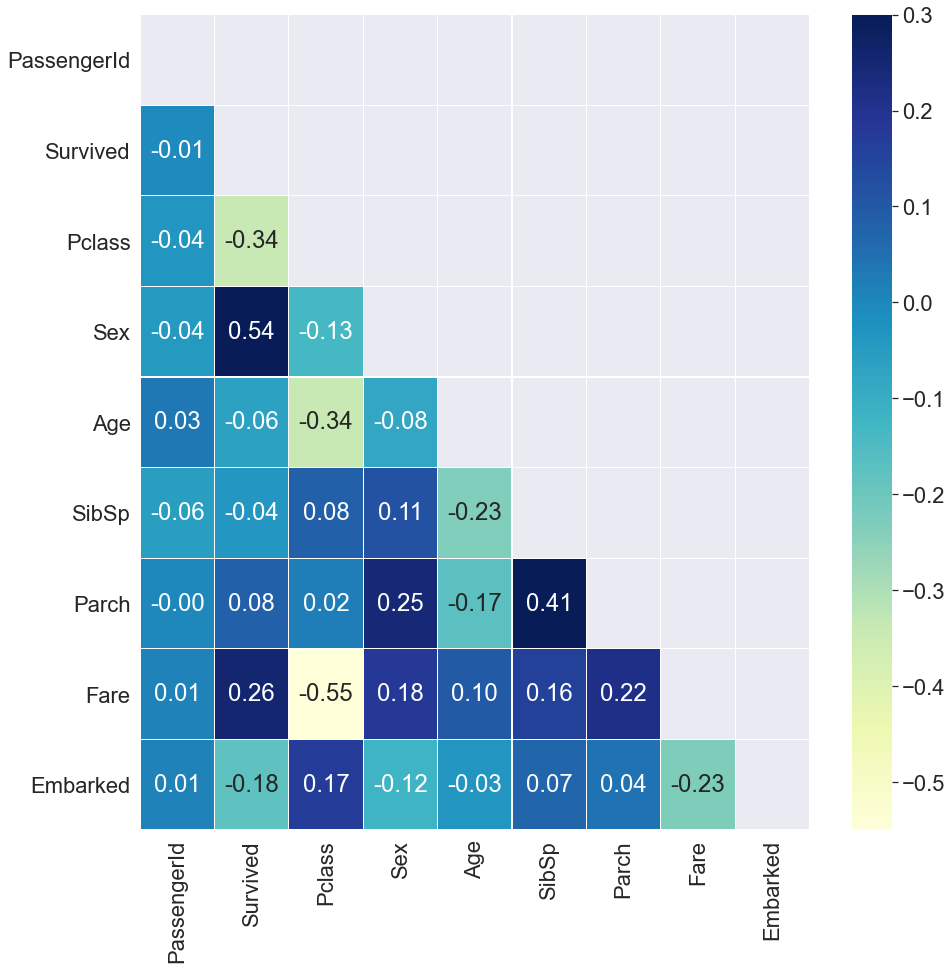

In [34]:
# Correlation matrix after filling na's using seaborn heatmap
corr_matrix = df_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
sns.set(font_scale=2) 

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                 vmax=.3,
                 annot=True,
                 linewidths=0.2,
                 fmt=".2f",
                 cmap="YlGnBu",
                 mask = mask)

Since over 70% of cabin values are missing I will drop that column.


In [35]:
df_train.drop(columns="Cabin",axis=1, inplace=True)


In [36]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

I will also drop 2 rows with missing Embarked

In [37]:
df_train.dropna(inplace=True)
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
# Dropping Name 
df_train.drop(columns=["Name"], inplace=True)

In [39]:
# Dropping Ticket Column
df_train.drop(columns=["Ticket"], inplace=True)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int8   
dtypes: float64(2), int64(6), int8(1)
memory usage: 63.5 KB


# 5. Modelling
Since I'm working on classification problem with less than 100K samples, I will try to use LogisticRegression, KNeighborsClassifier and Ensemble Classifier

In [41]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [42]:
# Split data into X and y
X = df_train.drop("Survived", axis=1)

y = df_train["Survived"]

In [43]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,0
2,3,3,1,26.0,0,0,7.9250,2
3,4,1,1,35.0,1,0,53.1000,2
4,5,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,2
887,888,1,1,19.0,0,0,30.0000,2
888,889,3,1,28.0,1,2,23.4500,2
889,890,1,0,26.0,0,0,30.0000,0


In [44]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,332,1,0,45.5,0,0,28.5000,2
733,734,2,0,23.0,0,0,13.0000,2
382,383,3,0,32.0,0,0,7.9250,2
704,705,3,0,26.0,1,0,7.8542,2
813,814,3,1,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...,...
106,107,3,1,21.0,0,0,7.6500,2
270,271,1,0,28.0,0,0,31.0000,2
860,861,3,0,41.0,2,0,14.1083,2
435,436,1,1,14.0,1,2,120.0000,2


In [46]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=10000),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Creating function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fitst and evaluate give machine learning models.
    models : a dictionary of different SciKit-Learn machine learning models
    X_train : training data (no labels)
    X_test : test data (no labels)
    y_train : training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [47]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [48]:
model_scores

{'Logistic Regression': 0.8044692737430168,
 'KNN': 0.659217877094972,
 'Random Forest': 0.8268156424581006}

As far as I see Logistic Regression and Random Forest are doing the best, so I will hypertune them


In [49]:
# Create a hyperparameter for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [50]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid, 
                                cv=10,
                                verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(X_test, y_test)

0.7932960893854749

### Now let's tune our RandomForest model


In [53]:
# Setup random seed
np.random.seed(42)

# Setup randopm hyperparameter search for RFC
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RFC
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [55]:
np.random.seed(42)
rs_rf.score(X_test, y_test)

0.8100558659217877

## Hyperparameter Tuning with GridSearchCV

In [56]:
np.random.seed(42)
# Create a hyperparameter for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



In [57]:
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True,
                          n_jobs=-1)

# Train our model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [58]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
np.random.seed(42)
gs_log_reg.score(X_test,y_test)

0.7932960893854749

In [60]:
np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True,
                        n_jobs=-1)

# Train our model
gs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2466 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 4066 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 5016 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6066 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 7216 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 8466 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 9816 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 11266 tasks      |

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [62]:
gs_rf.score(X_test,y_test)

0.8044692737430168

In [63]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 60}

In [64]:
df_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2
887,888,1,1,1,19.0,0,0,30.0000,2
888,889,0,3,1,28.0,1,2,23.4500,2
889,890,1,1,0,26.0,0,0,30.0000,0


In [65]:
X_df_train = df_train.drop(columns="Survived")
y_df_train = df_train["Survived"]

In [66]:
X_df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,2
1,2,1,1,38.0,1,0,71.2833,0
2,3,3,1,26.0,0,0,7.9250,2
3,4,1,1,35.0,1,0,53.1000,2
4,5,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,2
887,888,1,1,19.0,0,0,30.0000,2
888,889,3,1,28.0,1,2,23.4500,2
889,890,1,0,26.0,0,0,30.0000,0


In [78]:
# Train RandomForestClassifier model with the best params
np.random.seed(42)

clf = RandomForestClassifier(n_estimators = 60,
                             max_depth = 5,
                             min_samples_leaf = 3,
                             min_samples_split = 8
                             )

# Train our model
clf.fit(X_df_train, y_df_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8,
                       n_estimators=60)

# Preparing Test Data for Predicting

In [118]:
df_test.drop(columns=["Cabin"], inplace=True)

In [119]:
df_test.drop(columns=["Ticket"], inplace=True)

In [120]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [121]:
df_test["Age"].fillna(value=df_test["Age"].median(), inplace=True)

# Changing Male/Female to 0/1
df_test["Sex"] = df_test["Sex"].map(dict(zip(["male", "female"], [0,1])))
# Change Embarked to Categories
df_test["Embarked"] = df_test["Embarked"].astype("category")
df_test["Embarked"] = df_test["Embarked"].cat.codes

In [122]:
df_test.drop(columns=["Name"], inplace=True)

In [124]:
df_test["Fare"].fillna(value=df_test["Fare"].median(), inplace=True)

In [125]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [126]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,2
414,1306,1,1,39.0,0,0,108.9000,0
415,1307,3,0,38.5,0,0,7.2500,2
416,1308,3,0,27.0,0,0,8.0500,2


In [127]:
# Set random seed
np.random.seed(42)

# Predict
preds = clf.predict(df_test)

In [128]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [129]:
submission = pd.DataFrame()

In [130]:
submission["PassengerId"] = df_test["PassengerId"]

In [131]:
submission["Survived"] = preds

In [132]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [133]:
submission.to_csv("data/test_predictions.csv", index=False)

Scored at Kaggle as .79186 = 79% Accuracy